In [1]:
import os
os.chdir('/Users/wozhengzw/Documents/data/HiMTL/code')
import numpy as np
import pandas as pd
# from deepctr.feature_column import SparseFeat, DenseFeat, get_feature_names
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
# from matplotlib import pyplot as plt

FRAC = 0.25

In [6]:
!python3 -V

Python 3.5.6 :: Anaconda, Inc.


In [10]:
data = pd.read_pickle('../sampled_data/data_0.25.pkl')
sparse_features = ['userid', 'adgroup_id', 'pid', 'cms_segid', 'cms_group_id', 'final_gender_code', 'age_level',
                       'pvalue_level', 'shopping_level', 'occupation', 'new_user_class_level', 'campaign_id',
                       'customer', 'cate_id', 'brand'] # 15 sparse features

In [ ]:
# data1 = pd.read_pickle('../sampled_data/data_mtl_v4_0.25.pkl')

In [5]:
label_cate = np.zeros([data.shape[0], 1], dtype=np.int)
label_customer = np.zeros([data.shape[0], 1], dtype=np.int)
data['label_cate']=label_cate
data['label_customer']=label_customer

In [8]:
cate_dic, customer_dic = {}, {}
for name, group in tqdm(data.groupby(['userid', 'cate_id'])):
    clk_n = group[group.clk==1].shape[0]
    key_name = str(name[0]) + '-' + str(name[1])
    cate_dic[key_name] = clk_n
    
for name, group in tqdm(data.groupby(['userid', 'customer'])):
    clk_n = group[group.clk==1].shape[0]
    key_name = str(name[0]) + '-' + str(name[1])
    customer_dic[key_name] = clk_n

Please check the latest version manually on https://pypi.org/project/deepctr/#history


100%|██████████| 4495427/4495427 [1:22:23<00:00, 909.41it/s]


In [24]:
pd.to_pickle(cate_dic, '../sampled_data/cate_dic.pkl')
pd.to_pickle(customer_dic, '../sampled_data/customer_dic.pkl')

In [39]:
len(customer_dic.values())

4495427

In [6]:
cate_dic = pd.read_pickle('../sampled_data/cate_dic.pkl')
customer_dic = pd.read_pickle('../sampled_data/customer_dic.pkl')

In [7]:
def func(x, dic):
    key_name = str(x[0])+'-'+str(x[1])
    if x[2] == 1:
        return dic[key_name] - 1
    else:
        return dic[key_name]

data['label_cate'] = data[['userid', 'cate_id', 'clk']].apply(lambda x: func(x, cate_dic), axis=1)
data['label_customer'] = data[['userid', 'customer', 'clk']].apply(lambda x: func(x, customer_dic), axis=1)

Please check the latest version manually on https://pypi.org/project/deepctr/#history


In [9]:
pd.to_pickle(data, '../sampled_data/data_mtl_v3_' + str(FRAC) + '.pkl')

In [41]:
data.head()

,userid,time_stamp,adgroup_id,pid,nonclk,clk,cms_segid,cms_group_id,final_gender_code,age_level,...,occupation,new_user_class_level,cate_id,campaign_id,customer,brand,price,label_cate,label_customer,counter
0,171978,1494115387,3,0,1,0,0,4,1,4,...,0,1,1740,281917,19321,21329,176.0,0,0,0
1,58245,1494281673,4,0,1,0,20,3,1,3,...,0,3,3088,97655,4868,17782,289.0,0,0,1
2,130268,1494545239,4,0,1,0,0,3,1,3,...,0,0,3088,97655,4868,17782,289.0,0,0,2
3,89115,1494475741,4,0,1,0,20,3,1,3,...,0,4,3088,97655,4868,17782,289.0,0,0,3
4,58245,1494540717,4,0,1,0,20,3,1,3,...,0,3,3088,97655,4868,17782,289.0,0,0,4


In [15]:
data = pd.read_pickle('../sampled_data/data_0.25.pkl')

In [28]:
data.head()

,userid,time_stamp,adgroup_id,pid,nonclk,clk,cms_segid,cms_group_id,final_gender_code,age_level,...,occupation,new_user_class_level,cate_id,campaign_id,customer,brand,price,counter,label_cate,label_customer
0,171978,1494115387,3,0,1,0,0,4,1,4,...,0,1,1740,281917,19321,21329,176.0,0,0,0
1,58245,1494281673,4,0,1,0,20,3,1,3,...,0,3,3088,97655,4868,17782,289.0,1,3,0
2,130268,1494545239,4,0,1,0,0,3,1,3,...,0,0,3088,97655,4868,17782,289.0,2,5,0
3,89115,1494475741,4,0,1,0,20,3,1,3,...,0,4,3088,97655,4868,17782,289.0,3,0,0
4,58245,1494540717,4,0,1,0,20,3,1,3,...,0,3,3088,97655,4868,17782,289.0,4,4,0


In [17]:
data['counter'] = range(len(data))

In [24]:
cate_dic_pd = pd.read_pickle('../sampled_data/cate_dic_pd.pkl')
cate_dic_pd = cate_dic_pd.rename(columns={'label': 'label_cate'})

customer_dic_pd = pd.read_pickle('../sampled_data/customer_dic_pd.pkl')
customer_dic_pd = customer_dic_pd.rename(columns={'label': 'label_customer'})

In [25]:
data = pd.merge(data, cate_dic_pd, on='counter')
data = pd.merge(data, customer_dic_pd, on='counter')

In [26]:
pd.to_pickle(data, '../sampled_data/data_mtl_v4_' + str(FRAC) + '.pkl')

In [27]:
data.label_customer.value_counts()

0     5885118
1      264033
2       38790
3       10470
4        3340
5        1634
6         655
7         322
8         245
9         145
10         44
12         37
11         34
15         14
16         11
13          8
14          7
Name: label_customer, dtype: int64

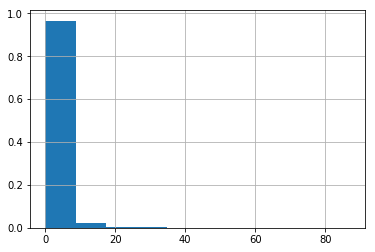

In [13]:
plt = data['label_cate'].hist(weights = np.ones_like(data.index) / len(data.index))

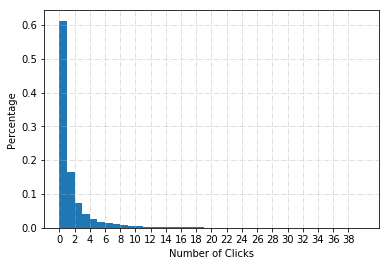

In [31]:
plt.figure() #初始化一张图
x = data['label_cate'].values
width = 40 #整合成一个参数
n, bins, patches = plt.hist(x,bins = width,range=(0,width), weights = np.ones_like(data.index) / len(data.index)) 
#print(n)
#print(bins)
#print(patches) 
plt.grid(alpha=0.5,linestyle='-.') #网格线，更好看 
plt.xlabel('Number of Clicks')  
plt.ylabel('Percentage')  
plt.xticks(np.arange(0,width,2))
plt.show()

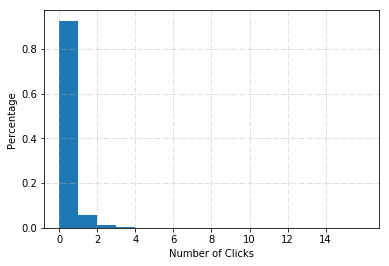

In [34]:
plt.figure() #初始化一张图
x = data['label_customer'].values
width = 16 #整合成一个参数
n, bins, patches = plt.hist(x,bins = width,range=(0,width), weights = np.ones_like(data.index) / len(data.index)) 
#print(n)
#print(bins)
#print(patches) 
plt.grid(alpha=0.5,linestyle='-.') #网格线，更好看 
plt.xlabel('Number of Clicks')  
plt.ylabel('Percentage')  
plt.xticks(np.arange(0,width,2))
plt.show()

In [33]:
data['label_customer'].value_counts()

0     5750772
1      348778
2       68167
3       20852
4        7884
5        4295
6        1669
7         799
9         598
8         593
10        136
12         99
13         95
15         68
14         49
16         41
11         12
Name: label_customer, dtype: int64

In [35]:
data['label_cate'].value_counts()

0     3799027
1     1017088
2      459509
3      257208
4      165243
5      109456
6       79412
7       60629
8       45108
9       35668
10      28727
12      18314
11      17851
13      13233
14      12522
15      11332
16       8036
17       7451
18       6817
19       5418
20       5260
23       4746
25       4025
21       3949
27       2507
26       2459
24       2451
33       2171
22       2154
30       2048
34       1761
35       1432
31       1325
32       1200
48       1165
40       1092
87       1047
58        770
36        628
29        612
49        591
54        519
46        519
75        478
57        287
70        277
41        269
55        266
28        245
39        120
47         96
86         87
74         75
69         70
56         57
53         54
45         46
Name: label_cate, dtype: int64

In [2]:
data = pd.read_pickle('../sampled_data/data_mtl_v4_' + str(FRAC) + '.pkl')

In [30]:
tqdm.pandas(desc='pandas bar')
def func1(x, maxD):
    while True:
        neg = np.random.randint(0, maxD)
        if neg != x:
            break
    return neg
cate_max = data['cate_id'].max()
data['neg_cate_id'] = data['cate_id'].progress_apply(lambda x: func1(x, cate_max+1))

pandas bar: 100%|██████████| 6204907/6204907 [00:25<00:00, 242780.33it/s]


In [31]:
customer_max = data['customer'].max()
data['neg_customer'] = data['customer'].progress_apply(lambda x: func1(x, customer_max+1))
pd.to_pickle(data, '../sampled_data/data_mtl_v5_' + str(FRAC) + '.pkl')

pandas bar: 100%|██████████| 6204907/6204907 [00:24<00:00, 254359.46it/s]


In [32]:
print(data['neg_cate_id'].max())
print(data['cate_id'].max())
print(data['neg_customer'].max())
print(data['customer'].max())

5971
5971
195840
195840
